# **Week 3**

## Univariate & Bivariate Analysis

In [1]:
import pandas as pd 
df = pd.read_csv("/Users/nishkarsh/Desktop/Infosys Internship/Week 2 /Updated_Dataset.csv")
df.head(9)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,14,Teenagers,Male,3.99,Need Attention,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban
1,11,Pre-teens,Female,4.61,Need Attention,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late teens,Female,3.73,Need Attention,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,No harm,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban
4,12,Pre-teens,Female,5.89,Need Attention,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban
5,14,Teenagers,Female,4.88,Need Attention,Smartphone,Portable,<30,True,0.44,Poor Sleep,Mental,Urban
6,17,Late teens,Male,2.97,No harm,TV,Wallmounted,>30,False,0.48,No health impacts,No Impact,Rural
7,10,Pre-teens,Male,2.74,No harm,TV,Wallmounted,>30,True,0.54,No health impacts,No Impact,Urban
8,14,Teenagers,Male,4.61,Need Attention,Laptop,Portable,<30,True,0.36,"Poor Sleep, Anxiety",Mental,Rural


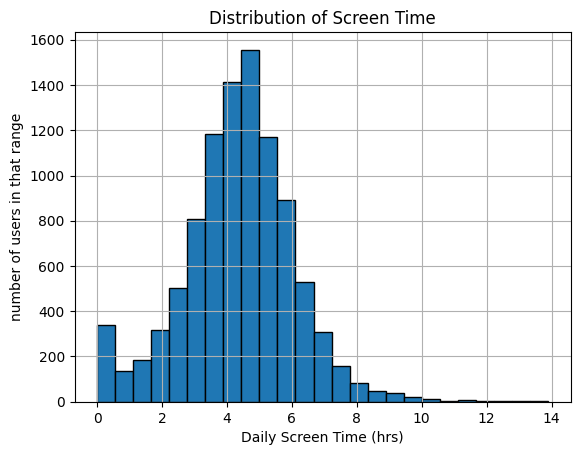

In [2]:
#Univariate Analysis- Screen Time Distribution

import matplotlib.pyplot as plt

df['Avg_Daily_Screen_Time_hr'].hist(bins=25, edgecolor="black")
plt.xlabel("Daily Screen Time (hrs)")
plt.ylabel("number of users in that range")
plt.title("Distribution of Screen Time")
plt.show()



**Highlights-** 

Most users spend 3–6 hours daily, with a peak around 4–5 hours.

Very few users fall below 1 hour or above 8 hours.

The pattern shows a moderate usage trend, with limited extreme cases.

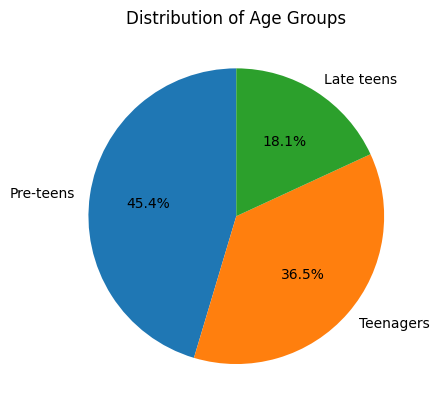

In [16]:
#Univariate Analysis- Disctribution of Age Groups
df['Age_Group'].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.ylabel("")
plt.title("Distribution of Age Groups")
plt.show()


**Highlights-**

Most users are Pre-teens and Teenagers.

Late teens are the smallest group.

The data shows a younger-skewed user base.

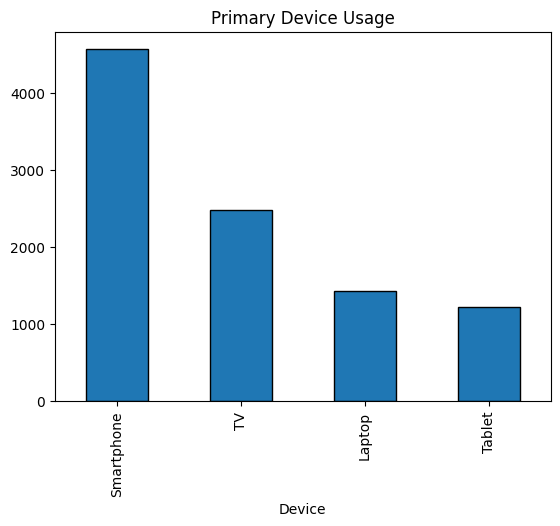

In [4]:
#Univariate Analysis- Primary Device
df['Primary_Device'].value_counts().plot(kind="bar", edgecolor="black")
plt.xlabel("Device")
plt.title("Primary Device Usage")
plt.show()


**Highlights-**

Smartphones are the most commonly used device.

Laptops and tablets are less common; TVs are intermediate.

Users prefer portable devices over wall-mounted devices.

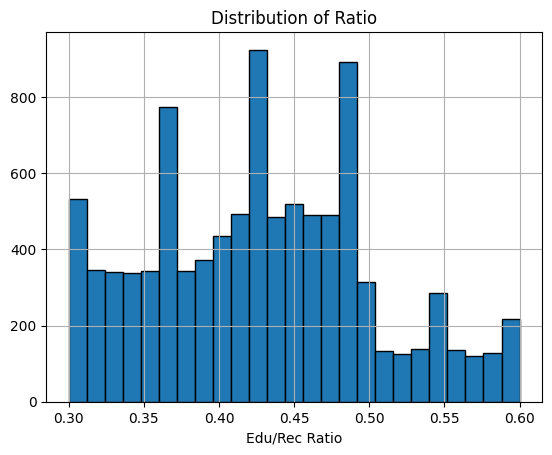

In [5]:
#Univariate Analysis- Educational to Recreational Ratio
df['Educational_to_Recreational_Ratio'].hist(bins=25, edgecolor="black")
plt.xlabel("Edu/Rec Ratio")
plt.title("Distribution of Ratio")
plt.show()


**Highlights-**

Most users have a ratio around 0.3–0.5, meaning recreational time is higher.

Few users have very high educational ratios.

Age group slightly affects the ratio: older users tend to have higher educational ratios.

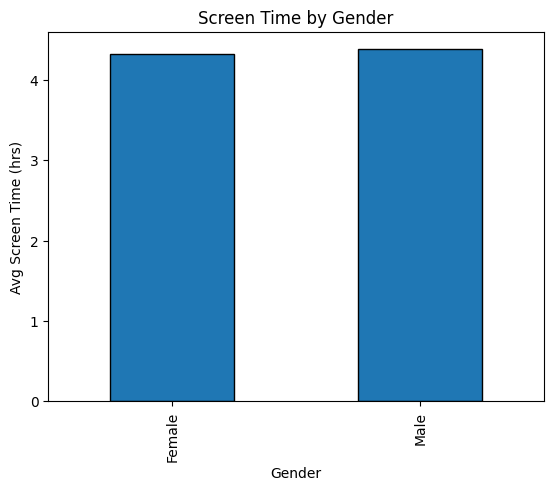

In [6]:
#Bivariate Analysis- Average Daily Screen Time by Gender
df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean().plot(kind="bar", edgecolor="black")
plt.ylabel("Avg Screen Time (hrs)")
plt.title("Screen Time by Gender")
plt.show()


**Highlights-**

Males and females have similar average screen time.

Slightly higher usage is seen in males.

Gender does not strongly affect daily screen time.

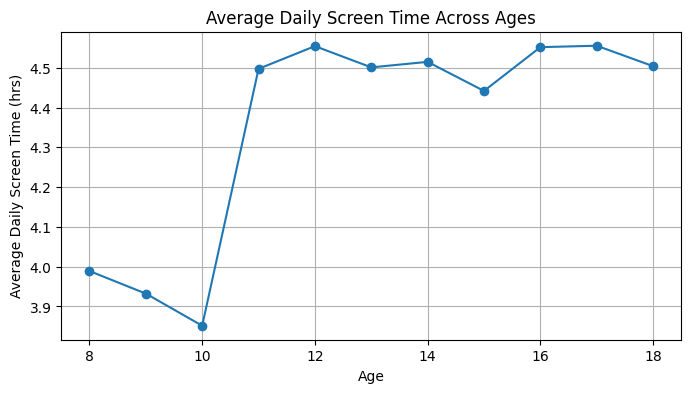

In [15]:
#Bivariate Analysis- Screen Time by Age Group
avg_screen_time_by_age = df.groupby('Age')['Avg_Daily_Screen_Time_hr'].mean()
plt.figure(figsize=(8,4))
avg_screen_time_by_age.plot(kind='line', marker='o')
plt.xlabel("Age")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.title("Average Daily Screen Time Across Ages")
plt.grid(True)
plt.show()


**Highlights-**

Screen time gradually increases from pre-teens to late teens.

Highest average around ages 16–17, ~4.5 hrs/day.

Overall screen time varies but no big difference by age group.

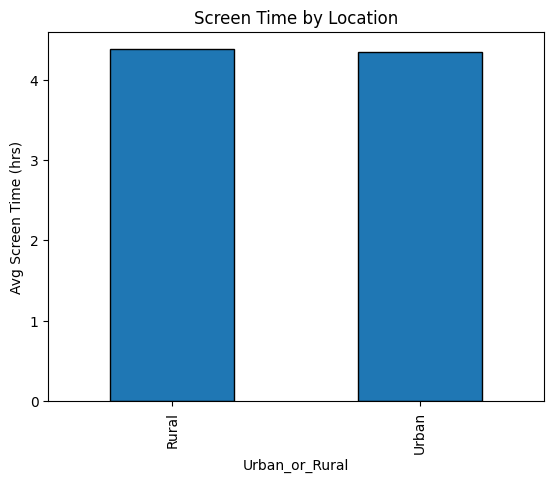

In [8]:
#Bivariate Analysis- Avg Screen Time by Location (Urban/Rural)
df.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean().plot(kind="bar", edgecolor="black")
plt.ylabel("Avg Screen Time (hrs)")
plt.title("Screen Time by Location")
plt.show()


**Highlights-**

Urban users spend slightly more time on screens.

Rural users have lower average screen time.

Location shows moderate influence on usage.

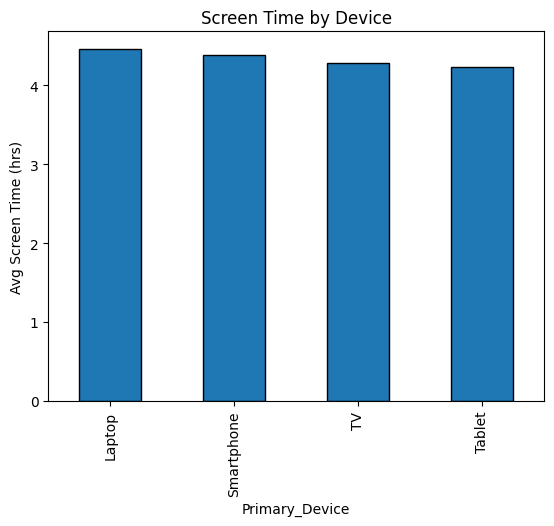

In [9]:
#Bivariate Analysis- Avg Screen Time by Primary Device
df.groupby('Primary_Device')['Avg_Daily_Screen_Time_hr'].mean().plot(kind="bar", edgecolor="black")
plt.ylabel("Avg Screen Time (hrs)")
plt.title("Screen Time by Device")
plt.show()


**Highlights-** 

Average daily screen time is slightly similar across all device types.

Laptop and smartphone users have slightly higher average screen time than TV and tablet users.

Device choice does not lead to major differences in average usage hours

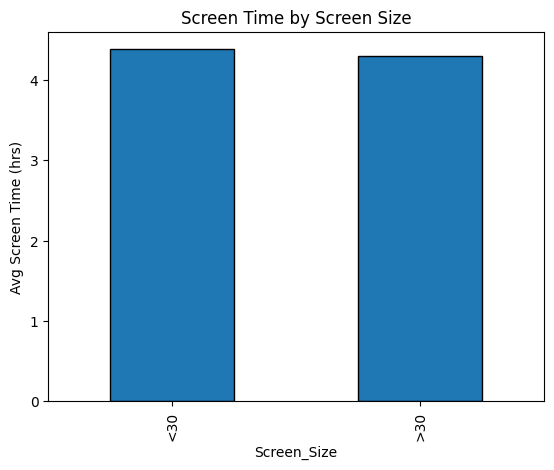

In [10]:
#Bivariate Analysis- Screen Time by Screen Size
df.groupby('Screen_Size')['Avg_Daily_Screen_Time_hr'].mean().plot(kind="bar", edgecolor="black")
plt.ylabel("Avg Screen Time (hrs)")
plt.title("Screen Time by Screen Size")
plt.show()


**Highlights-**

Average screen time is almost the same for both small (<30) and large (>30) screen sizes.

Screen size does not significantly affect daily usage hours.

Both groups have average daily usage above 4 hours.

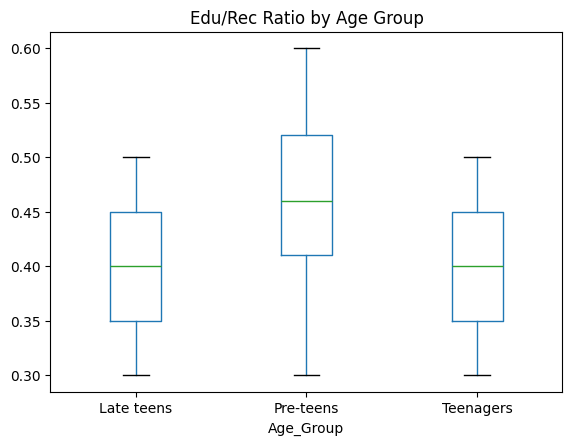

In [11]:
#Bivariate analysis- Educational Ratio by Age Group
df.boxplot(column="Educational_to_Recreational_Ratio", by="Age_Group", grid=False)
plt.suptitle("")
plt.title("Edu/Rec Ratio by Age Group")
plt.show()


**Highlights-**

Pre-teens have the highest median educational to recreational usage ratio.

Late teens and teenagers both show lower ratios, with late teens having the widest spread.

Educational use compared to recreational use is generally most balanced in pre-teens.

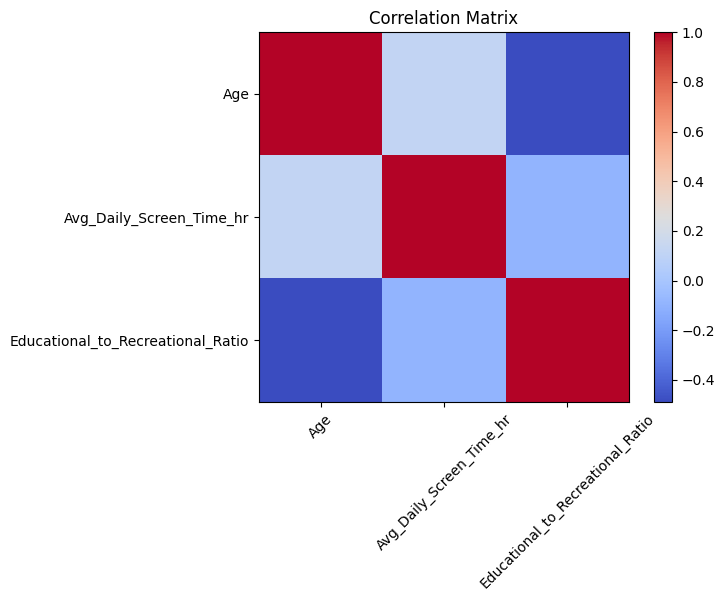

In [12]:
#correlation Heatmap
corr = df[['Age','Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio']].corr()
plt.imshow(corr, cmap="coolwarm") 
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns); plt.colorbar()
plt.title("Correlation Matrix")
plt.show()


**Highlights-**

Age and educational-to-recreational ratio have a strong negative correlation.

Average daily screen time and educational-to-recreational ratio also show a negative correlation.

Age and average daily screen time are weakly correlated, suggesting slight association

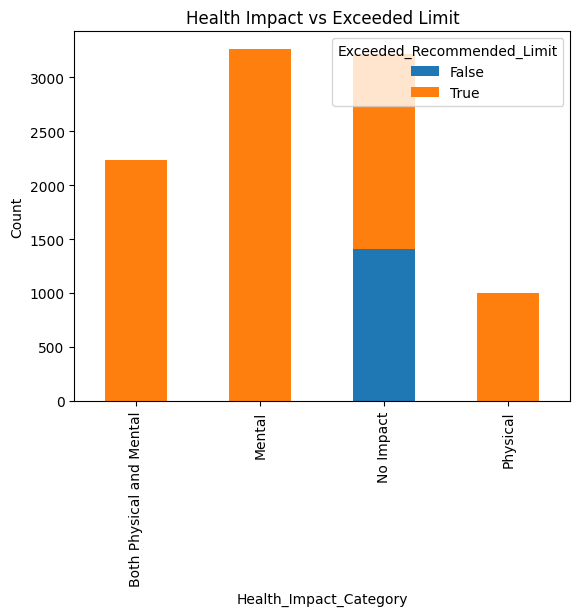

In [13]:
pd.crosstab(df['Health_Impact_Category'], df['Exceeded_Recommended_Limit']).plot(kind="bar", stacked=True)
plt.title("Health Impact vs Exceeded Limit")
plt.ylabel("Count")
plt.show()


**Highlights-**

Most people who exceeded the recommended limit reported mental or both physical and mental health impacts.

The "No Impact" group has more individuals who did not exceed the recommended limit.

Physical impact alone is less common, and nearly all reported cases exceeded the limit